<a href="https://colab.research.google.com/github/PalmChalan/AI-Engineering-Coursework/blob/main/KMeans_Iris-Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

## Load the dataset

In [ ]:
import pandas as pd

# Iris Data
# 150 samples with 3 distinct class of iris plant: Iris Setosa, Iris Versicolour, and Iris Virginica
# Features are its sepal/petal width and length
# https://archive.ics.uci.edu/dataset/53/iris
url = '/content/Iris (1).csv'
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species_numerical'] = df['Species'].map(species_mapping)
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_numerical
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
df = df.drop(['Id', 'Species'], axis=1)
display(df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_numerical
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('Species_numerical', axis=1)
y = df['Species_numerical']
print(X.shape, y.shape)

(150, 4) (150,)


## Clustering

In [ ]:
from sklearn.cluster import KMeans
# We know it is 3 different classes
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
y_pred = model.predict(X)
print(y_pred.shape)

(150,)


## Assesing the clustering quality

In [ ]:
from sklearn import metrics
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.7163421126838476


## Clustering quality with input normalization

In [ ]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X.iloc[:,0].mean(), X.iloc[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3, random_state=0)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 5.843333333333334 0.8280661279778629
after mean and sd: -4.736951571734001e-16 1.0
ARI after normalized: 0.6410058621782706


In [ ]:
# don't even need to zero the mean!
scaler = StandardScaler(with_mean=False, with_std=True)
_X = scaler.fit_transform(X)
print('before mean and sd:', X.iloc[:,0].mean(), X.iloc[:,0].std())
print('after mean and sd:', _X[:,0].mean(), _X[:,0].std())

model = KMeans(n_clusters=3)
# using the normalized X
model.fit(_X)
y_pred = model.predict(_X)
print('ARI after normalized:', metrics.adjusted_rand_score(y, y_pred))

before mean and sd: 5.843333333333334 0.8280661279778629
after mean and sd: 7.080242562924024 1.0
ARI after normalized: 0.645147003482001


## Wrap as a pipeline

In [ ]:
# Pipelines combine multiple steps ** Wrap up the above as a pipeline
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

kmeans = KMeans(n_clusters=3, random_state=0)
pipeline = make_pipeline(kmeans)
pipeline.fit(X)
y_pred = pipeline.predict(X)
print('ARI:', metrics.adjusted_rand_score(y, y_pred))

ARI: 0.7163421126838476


In [ ]:
from tqdm import tqdm
# Run K-means for a set of k
distortions = []
models = []
K = range(1,10+1)
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

100%|██████████| 10/10 [00:00<00:00, 268.11it/s]


## Selecting the "K" with Elbow method

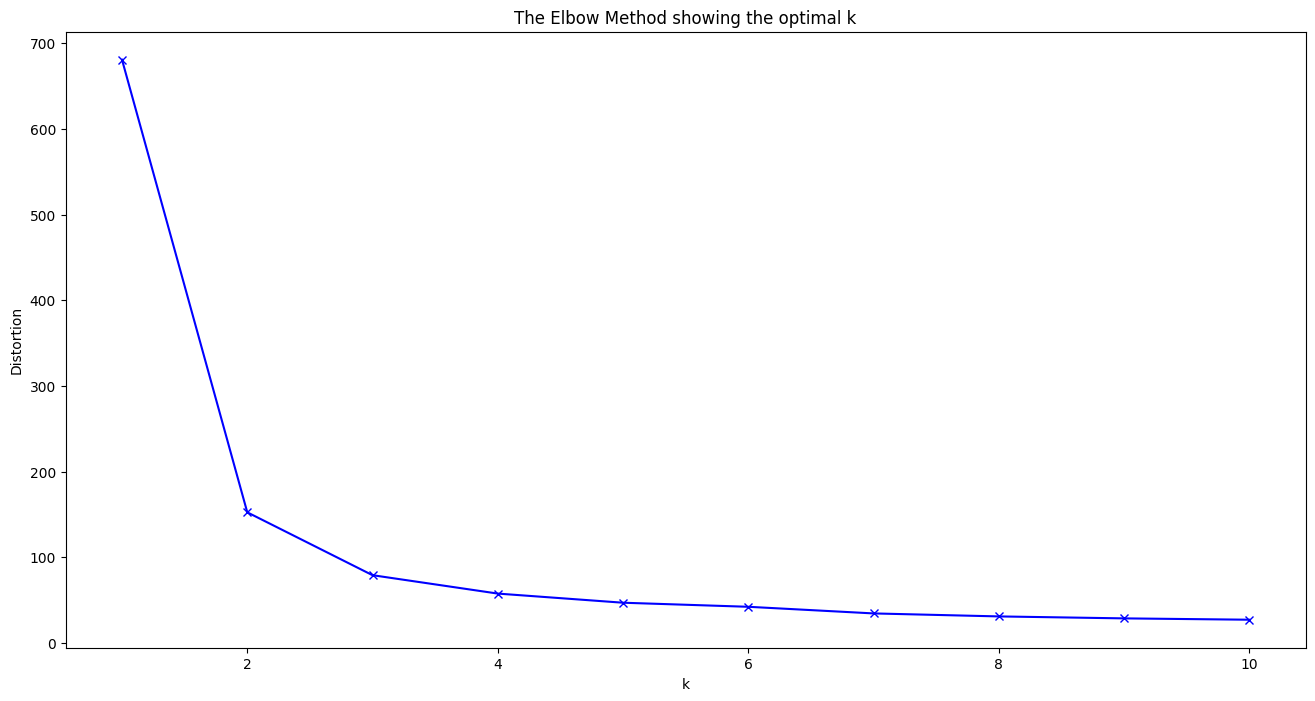

In [ ]:
#Plotting the distortions of K-Means
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

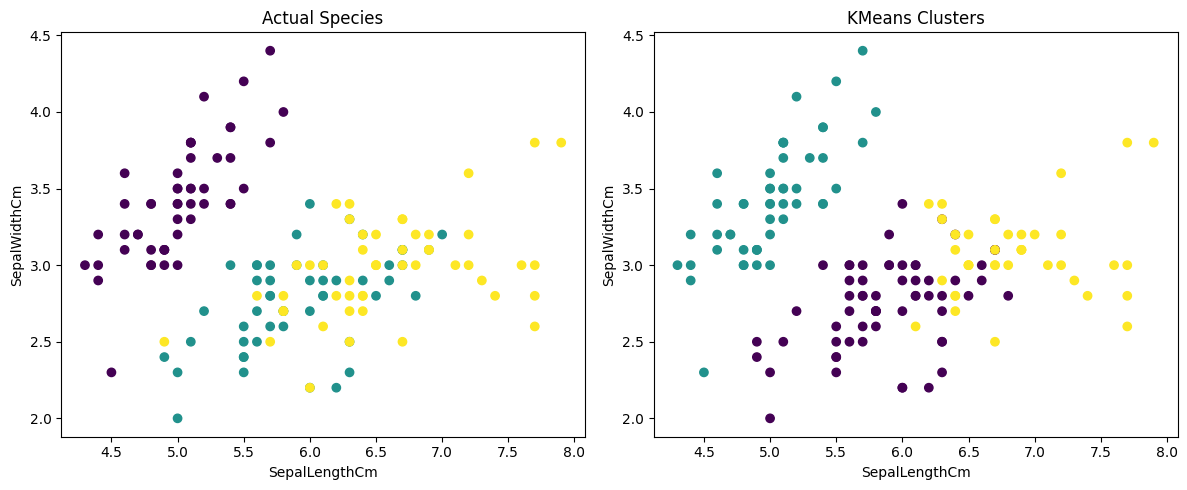

In [ ]:
import matplotlib.pyplot as plt

# Assuming X contains the features and y contains the actual species labels
# Assuming y_pred contains the KMeans predicted cluster labels

# Scatter plot of actual species
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Actual Species')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

# Scatter plot of KMeans clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='viridis')
plt.title('KMeans Clusters')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

plt.tight_layout()
plt.show()

# Hierarchical Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = '/content/Iris (1).csv'
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species_numerical'] = df['Species'].map(species_mapping)
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_numerical
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
df = df.drop(['Id', 'Species'], axis=1)
display(df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_numerical
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = df.drop('Species_numerical', axis=1)
y = df['Species_numerical']
print(X.shape, y.shape)

(150, 4) (150,)


In [ ]:
from scipy.cluster.hierarchy import dendrogram

def get_linkage(model):
    # needed for visualization
    # from: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix

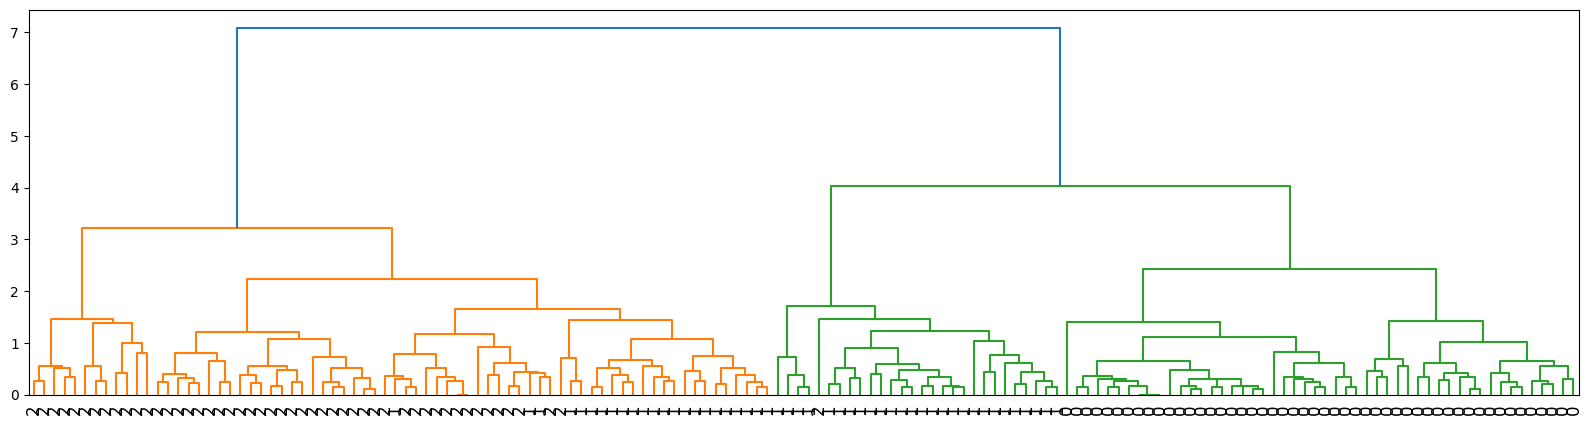

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

model = AgglomerativeClustering(linkage='complete',
                                distance_threshold=0, # to calculate the full tree
                                n_clusters=None)
model = model.fit(X)

# get linkages
links = get_linkage(model)
# plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           labels=list(df['Species_numerical']),
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);

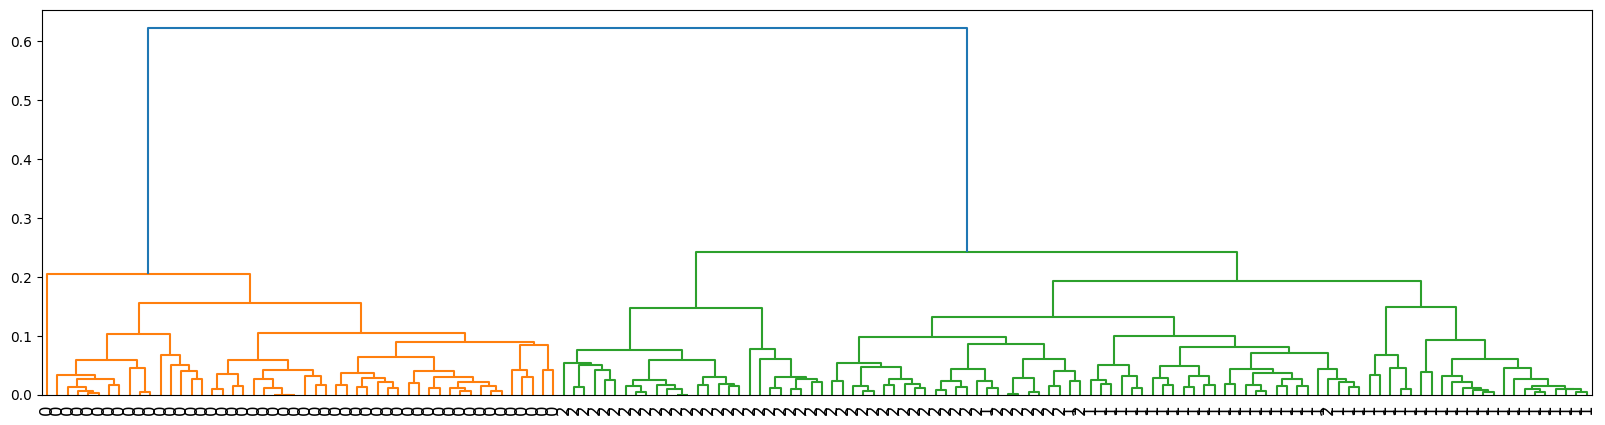

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(linkage='complete',
                                distance_threshold=0,
                                n_clusters=None)
model = model.fit(X_norm)

links = get_linkage(model)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 5))
dendrogram(links,
           labels=list(df['Species_numerical']),
           leaf_rotation=90,
           leaf_font_size=12,
           ax=ax);

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(n_clusters=3,
                                linkage='complete')
y_pred = model.fit_predict(X_norm)
print('pred:', y_pred)

pred: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 2 2 2 2 2 1
 1 1 2 2 2 1 1 2 2 2 2 2 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 2 2 1 1 1
 2 1]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

model = AgglomerativeClustering(linkage='ward',
                                distance_threshold=0,
                                n_clusters=None)
model.fit(X_norm)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

# normalize each row to be a unit vector
X_norm = normalize(X)

# 8 seems to be the number of clusters (corresponds to 52 merges)
model = AgglomerativeClustering(linkage='ward',
                                n_clusters=8)
y_pred = model.fit_predict(X_norm)
print(y_pred)

[2 0 2 0 2 2 2 2 0 0 2 0 0 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 0 0 0 2 2 0 2 2
 0 2 2 2 0 2 0 0 0 2 2 2 2 3 1 1 1 1 1 1 3 3 1 7 1 7 1 3 3 1 3 7 3 1 3 5 1
 3 3 7 1 1 3 3 3 3 4 1 1 1 7 1 1 1 1 3 3 1 1 1 1 3 1 4 4 5 4 4 6 4 6 6 4 1
 5 5 4 4 4 4 4 6 6 4 4 6 5 4 5 5 1 4 5 6 1 4 5 6 5 4 4 1 5 4 5 4 4 4 5 5 5
 4 4]


In [ ]:
df2 = pd.DataFrame({
    'Species': df['Species_numerical'],
    'cluster': y_pred,
})
df2.head()

,Species,cluster
0,0,2
1,0,0
2,0,2
3,0,0
4,0,2


In [ ]:
df2.sort_values('cluster')

,Species,cluster
1,0,0
3,0,0
9,0,0
8,0,0
12,0,0
...,...,...
76,1,7
87,1,7
62,1,7
60,1,7


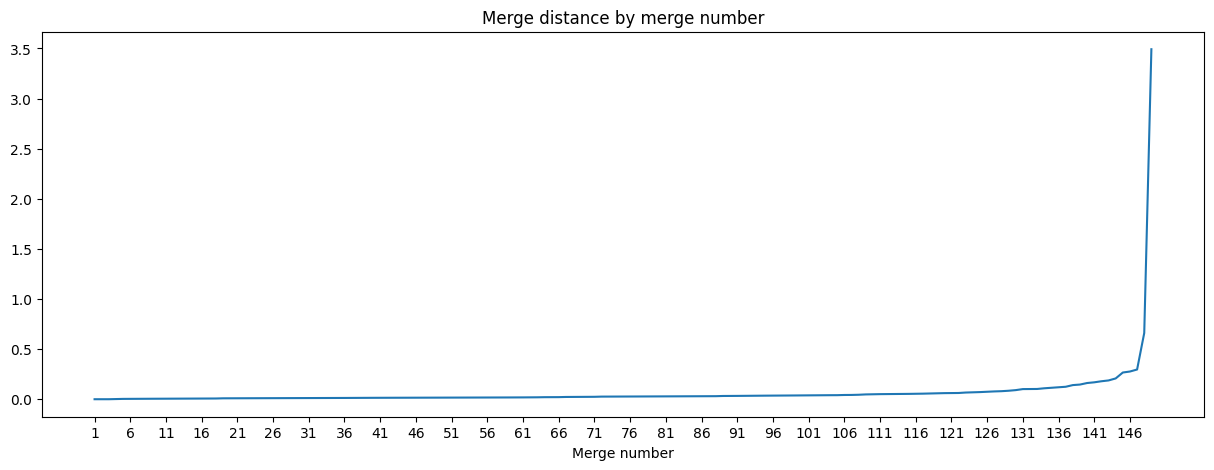

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
xticks = np.arange(1, len(model_full.distances_) + 1)
ax.set_title('Merge distance by merge number')
ax.set_xticks(xticks[::5]) # Show fewer ticks for clarity
ax.set_xlabel('Merge number')
ax.plot(xticks, model_full.distances_)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Fit the model to calculate the full dendrogram and access distances_
model_full = AgglomerativeClustering(linkage='ward',
                                     distance_threshold=0,
                                     n_clusters=None)
model_full.fit(X_norm)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

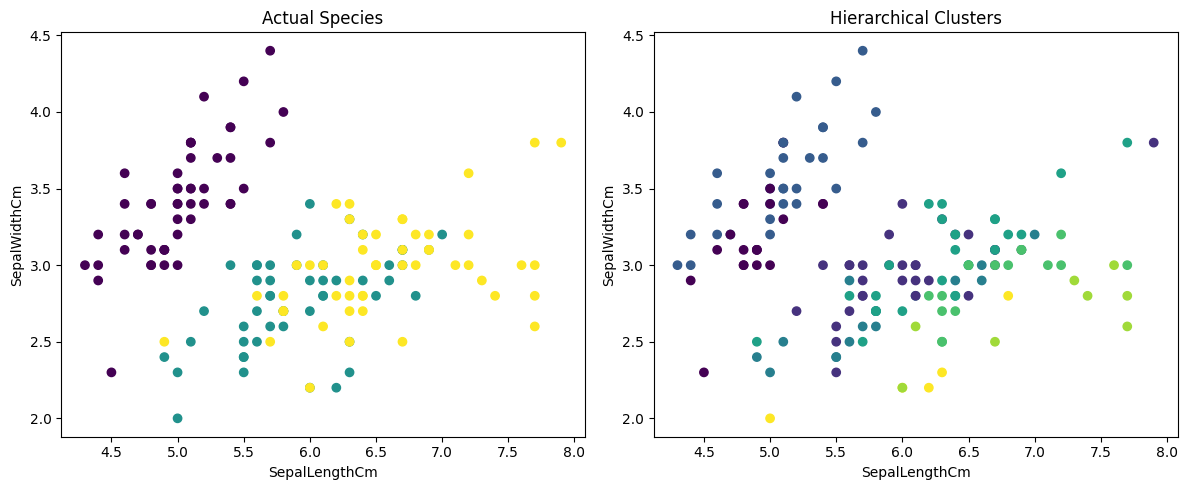

In [ ]:
import matplotlib.pyplot as plt

# Assuming X contains the features and y contains the actual species labels
# Assuming y_pred contains the Hierarchical clustering predicted cluster labels from the last run

# Scatter plot of actual species
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Actual Species')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

# Scatter plot of Hierarchical clusters
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred, cmap='viridis')
plt.title('Hierarchical Clusters')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])

plt.tight_layout()
plt.show()